# Imports 

In [1]:
import pandas as pd
import os
import re
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import numpy as np
import matplotlib.patches as mpatches

# Functions

def convert_to_wsl_path(windows_path: str) -> str:
    windows_path = windows_path.replace("\\", "/")
    wsl_path = re.sub(
        r"^([A-Za-z]):/", lambda m: f"/mnt/{m.group(1).lower()}/", windows_path
    )
    return wsl_path

# Datasets

### Read files

In [2]:
output_dir = r"C:\Users\joaof\OneDrive\Education\University\PhD_UVM\Courses\202526\Fall\CS5870A_DataScienceI\Project\DSE-Project\Data_Processing\inputs\FED_data"

In [16]:
### Read all unzipped files stored locally
dfs = {}

for root, dirs, files in os.walk(output_dir):
    for dir_ in dirs[::-1]:
        for file in os.listdir(os.path.join(output_dir,dir_)):
            if file.startswith("BHCF") and file.endswith(".txt"):
                #extract date to add to col
                date_str = file.replace("BHCF", "").replace(".txt", "")
                
                #code to read file
                file_path = os.path.join(output_dir,dir_, file)
                print(f"file_path: {file_path.split('/')[-1]}")
                print('--')
                try:
                    df = pd.read_csv(file_path, sep="^", encoding="latin1",dtype=str)
                except:
                    df = pd.read_csv(file_path, sep="^", encoding="latin1",dtype=str,quoting=csv.QUOTE_NONE)
                
                # Add quarter column
                df["quarter"] = date_str

                # Store dataframe in dictionary with key = date string
                dfs[date_str] = df
                break
            break
        #break

file_path: C:\Users\joaof\OneDrive\Education\University\PhD_UVM\Courses\202526\Fall\CS5870A_DataScienceI\Project\DSE-Project\Data_Processing\inputs\FED_data\BHCF20250630\BHCF20250630.txt
--
file_path: C:\Users\joaof\OneDrive\Education\University\PhD_UVM\Courses\202526\Fall\CS5870A_DataScienceI\Project\DSE-Project\Data_Processing\inputs\FED_data\BHCF20250331\BHCF20250331.txt
--
file_path: C:\Users\joaof\OneDrive\Education\University\PhD_UVM\Courses\202526\Fall\CS5870A_DataScienceI\Project\DSE-Project\Data_Processing\inputs\FED_data\BHCF20241231\BHCF20241231.txt
--
file_path: C:\Users\joaof\OneDrive\Education\University\PhD_UVM\Courses\202526\Fall\CS5870A_DataScienceI\Project\DSE-Project\Data_Processing\inputs\FED_data\BHCF20240930\BHCF20240930.txt
--
file_path: C:\Users\joaof\OneDrive\Education\University\PhD_UVM\Courses\202526\Fall\CS5870A_DataScienceI\Project\DSE-Project\Data_Processing\inputs\FED_data\BHCF20240630\BHCF20240630.txt
--
file_path: C:\Users\joaof\OneDrive\Education\Unive

### Upload columns data

Analysed each individual column from the database. Mid exercise I found one of the reports that returns data to National Information Center with the code to each line of the P&L.

- FR Y -9c financial statement: https://www.federalreserve.gov/reportforms/forms/FR_Y-9C20180930_f.pdf

- FR_Y-9LP financial statement (Parent Company Only Financial Statements for Large Bank Holding Companies): https://www.federalreserve.gov/reportforms/forms/FR_Y-9LP20220705_i.pdf

- FR Y-9SP financial statement (Parent Company Only Financial Statements for Small Holding Companies) - only reports data semi-annually https://www.federalreserve.gov/apps/reportingforms/Download/DownloadAttachment?guid=05505b4f-780d-49e0-a123-59e7cbf29afb

In [142]:
### Dataset has +2k cols
### Imported data dictionary with manually mapped cols identified as important
### These cols can have financial information (df_cols) or structural information (df_cols_meta)
path_data_dict_original = r"C:\Users\joaof\OneDrive\Education\University\PhD_UVM\Courses\202526\Fall\CS5870A_DataScienceI\Project\DSE-Project\Data_Processing\frozen\Financial_Download_Dictionary.xlsx"
#df_cols_data=pd.read_excel(convert_to_wsl_path(path_data_dict_original), sheet_name='Financial', engine='openpyxl')
df_cols_data=pd.read_excel(path_data_dict_original, sheet_name='Financial', engine='openpyxl')

In [143]:
df_cols_meta_original=pd.read_excel(path_data_dict_original, sheet_name='Structure', engine='openpyxl')
#df_cols_meta_original=pd.read_excel(convert_to_wsl_path(path_data_dict_original), sheet_name='Structure', engine='openpyxl')

In [144]:
df_cols_meta=df_cols_meta_original.rename(columns={'Item Name':'Short Description'})

### Analyses of dataset

In [145]:
##Merge structural and financial columns into a unique df of cols

cond_cols_to_consider_finance=df_cols_data['To consider']==True
cond_cols_to_consider_meta=df_cols_meta['to consider']==True
df_cols_aux= pd.concat([df_cols_data[cond_cols_to_consider_finance], 
                       df_cols_meta[cond_cols_to_consider_meta]],axis=0).reset_index(drop=True)


df_cols_final = df_cols_aux[['MDRM Item','Start Date','End Date','Short Description']]
dict_cols_final = dict(zip(df_cols_final['MDRM Item'],df_cols_final['Short Description']))
df_cols_final


,MDRM Item,Start Date,End Date,Short Description
0,BHCK1292,1996-03-31,9999-12-31 00:00:00,LOANS TO U.S. BANKS AND OTHER U.S. DEPOSITORY ...
1,BHCK1296,1996-03-31,9999-12-31 00:00:00,LOANS TO FOREIGN BANKS (BHC CONSOLIDATED)
2,BHCK2170,1976-12-31,9999-12-31 00:00:00,TOTAL ASSETS (BHC CONSOLIDATED)
3,BHCK3196,1994-03-31,9999-12-31 00:00:00,REALIZED GAINS (LOSSES) ON AVAILABLE-FOR-SALE ...
4,BHCK3368,1986-06-30,9999-12-31 00:00:00,QTLY AVG OF TOTAL ASSETS (BHC CONSOLIDATED)
5,BHCK3521,1994-03-31,9999-12-31 00:00:00,REALIZED GAINS (LOSSES) ON HELD-TO-MATURITY SE...
6,BHCK4079,1976-12-31,9999-12-31 00:00:00,TOTAL NONINTEREST INCOME (BHC CONSOLIDATED)
7,BHCK4107,1986-06-30,9999-12-31 00:00:00,TOTAL INTEREST INCOME (BHC CONSOLIDATED)
8,BHCK4340,1976-12-31,9999-12-31 00:00:00,NET INCOME (LOSS) ATTRIBUTABLE TO BANK HOLDING...
9,BHCKHT69,2018-03-31,9999-12-31 00:00:00,INCOME (LOSS) BEFORE UNREALIZED HOLDING GAINS ...


In [146]:
## consolidated quarterly dfs into a single df with required cols (previously identified). Consolidate all dfs with +2000 would break the kernel.
df_all = pd.DataFrame()

for date,df in dfs.items():
    df_all = pd.concat([df_all, df.loc[:,[col for col in dict_cols_final.keys() if col in df.columns] + ['quarter']]],axis=0)
    
df_all_final = df_all.reset_index(drop=True)

### Define revenue per financial institution

In [147]:
## add revenue col
### depending on the report revenue corresponded to one more multiple cols (represented by the codes, eg.: BHCK4107)
cols_revenue_FRY9C = ['BHCK4107','BHCK4079','BHCK3521','BHCK3196']
cols_revenue_FRY9SP = ['BHSP4000']
cols_revenue_FRY9LP = ['BHCP4000']

df_all_final[cols_revenue_FRY9C]=df_all_final[cols_revenue_FRY9C].astype(float)
df_all_final[cols_revenue_FRY9SP]=df_all_final[cols_revenue_FRY9SP].astype(float)
df_all_final[cols_revenue_FRY9LP]=df_all_final[cols_revenue_FRY9LP].astype(float)

df_all_final['REVENUE_FRY9C'] = df_all_final.loc[:,[*dict_cols_final, 'quarter']][cols_revenue_FRY9C].sum(axis=1)
df_all_final['REVENUE_FRY9SP'] = df_all_final.loc[:,[*dict_cols_final, 'quarter']][cols_revenue_FRY9SP].sum(axis=1)
df_all_final['REVENUE_FRY9LP'] = df_all_final.loc[:,[*dict_cols_final, 'quarter']][cols_revenue_FRY9LP].sum(axis=1)


print(f'cols_revenue_FRY9C')
for key, value in {key:val for key,val in dict_cols_final.items() if key in cols_revenue_FRY9C}.items():
    print(f"{key}: {value}")

cols_revenue_FRY9C
BHCK3196: REALIZED GAINS (LOSSES) ON AVAILABLE-FOR-SALE SECURITIES (BHC CONSOLIDATED)
BHCK3521: REALIZED GAINS (LOSSES) ON HELD-TO-MATURITY SECURITIES (BHC CONSOLIDATED)
BHCK4079: TOTAL NONINTEREST INCOME (BHC CONSOLIDATED)
BHCK4107: TOTAL INTEREST INCOME (BHC CONSOLIDATED)


In [183]:
## check revenue cols: at least total revenue from one report
### conclusion: some cols do not have value, which was unexpected and requires further analysis

cond_REVENUE_FRY9C_null = df_all_final['REVENUE_FRY9C']==0
cond_REVENUE_FRY9SP_null = df_all_final['REVENUE_FRY9SP']==0
cond_REVENUE_FRY9LP_null = df_all_final['REVENUE_FRY9LP']==0

aux = df_all_final[cond_REVENUE_FRY9C_null & cond_REVENUE_FRY9SP_null & cond_REVENUE_FRY9LP_null]
print(aux.shape[0],aux.shape[0]==0)

37819 False


In [98]:
## check if one type of revenue exist the other does not exist (TRUE, TRUE corresponds when both do not exist)
(df_all_final[['REVENUE_FRY9SP' , 'REVENUE_FRY9LP']]==0).value_counts()

REVENUE_FRY9SP  REVENUE_FRY9LP
False           True              159204
True            False             109874
                True               47812
Name: count, dtype: int64

In [198]:
df_all_final[(df_all_final['REVENUE_FRY9C']!=0) & (df_all_final['REVENUE_FRY9LP']==0)].loc[:,['RSSD9001','quarter'] + [col for col in df_all_final.columns if 'REVENUE' in col]].sort_values(by=['RSSD9001','quarter'])

,RSSD9001,quarter,REVENUE_FRY9C,REVENUE_FRY9SP,REVENUE_FRY9LP
233938,1021570,20050331,2400.0,0.0,0.0
298731,1021879,20010331,4766.0,0.0,0.0
282491,1022166,20020331,3578.0,0.0,0.0
276642,1022166,20020630,7107.0,0.0,0.0
274271,1022166,20020930,10423.0,0.0,0.0
...,...,...,...,...,...
8452,5806739,20240930,148447.0,0.0,0.0
7955,5806739,20241231,200508.0,0.0,0.0
4198,5806739,20250331,52151.0,0.0,0.0
3672,5806739,20250630,105306.0,0.0,0.0


In [207]:
df_all_final[df_all_final['RSSD9001']=='1021570'].loc[:,['RSSD9001','RSSD9017','quarter'] + [col for col in df_all_final.columns if 'REVENUE' in col]].sort_values(by=['RSSD9001','quarter'])

,RSSD9001,RSSD9017,quarter,REVENUE_FRY9C,REVENUE_FRY9SP,REVENUE_FRY9LP
308939,1021570,"VIKING CORPORATION, THE",20000630,0.0,0.0,0.0
300934,1021570,"VIKING CORPORATION, THE",20001231,0.0,454.0,0.0
292877,1021570,"VIKING CORPORATION, THE",20010630,0.0,45.0,0.0
284782,1021570,"VIKING CORPORATION, THE",20011231,0.0,98.0,0.0
276634,1021570,"VIKING CORPORATION, THE",20020630,0.0,1403.0,0.0
268517,1021570,"VIKING CORPORATION, THE",20021231,0.0,1404.0,0.0
261662,1021570,"VIKING CORPORATION, THE",20030630,0.0,2007.0,0.0
253356,1021570,"VIKING CORPORATION, THE",20031231,9808.0,0.0,2007.0
250765,1021570,"VIKING CORPORATION, THE",20040331,2356.0,0.0,550.0
244990,1021570,"VIKING CORPORATION, THE",20040630,4825.0,0.0,551.0


In [182]:
## Parent companies that are also holding companies have to both report FRY9C and FRY9LP 
## (if other subsidiaries have negative revenue the holding can have lower revenue than the parent)
## In FRY9C one dimension of revenue corresponds to "gains or losses of sale of specific assets". One reason to have unexpected negative values of revenue
cond_REVENUE_FRY9C_nonnull = df_all_final['REVENUE_FRY9C']!=0
cond_REVENUE_FRY9LP_max=(df_all_final[['REVENUE_FRY9C','REVENUE_FRY9SP' , 'REVENUE_FRY9LP']].abs().idxmax(axis=1))=='REVENUE_FRY9LP'
cond_REVENUE_FRY9C_max=(df_all_final[['REVENUE_FRY9C','REVENUE_FRY9SP' , 'REVENUE_FRY9LP']].abs().idxmax(axis=1))=='REVENUE_FRY9C'
cond_REVENUE_FRY9SP_max=(df_all_final[['REVENUE_FRY9C','REVENUE_FRY9SP' , 'REVENUE_FRY9LP']].abs().idxmax(axis=1))=='REVENUE_FRY9SP'

df_all_final[(cond_REVENUE_FRY9C_nonnull) & cond_REVENUE_FRY9LP_max][['RSSD9001','RSSD9017','quarter','REVENUE_FRY9C','REVENUE_FRY9SP' , 'REVENUE_FRY9LP']].sort_values(by=['RSSD9017','quarter'])

,RSSD9001,RSSD9017,quarter,REVENUE_FRY9C,REVENUE_FRY9SP,REVENUE_FRY9LP
4204,5902912,"ADAM CORPORATION/GROUP, THE",20250331,15589.0,0.0,31440.0
251938,1246926,"ALBANY BANCSHARES, INC.",20040331,2915.0,0.0,3160.0
235118,1246926,"ALBANY BANCSHARES, INC.",20050331,2944.0,0.0,3020.0
108040,2533100,"ALIKAT INVESTMENTS, INC.",20140630,4831.0,0.0,5301.0
104345,2533100,"ALIKAT INVESTMENTS, INC.",20140930,8937.0,0.0,11819.0
...,...,...,...,...,...,...
147505,1210066,"WEST BANCORPORATION, INC.",20110630,31660.0,0.0,38670.0
234485,1109227,"WESTERN COMMERCE BANCSHARES OF CARLSBAD, INC.",20050331,4252.0,0.0,4380.0
138632,3248513,"WILSHIRE BANCORP, INC.",20120331,36073.0,0.0,62171.0
110685,1399671,"WNB BANCSHARES, INC.",20140331,9570.0,0.0,20725.0


In [ ]:
## rule to create a single revenue col, based on inputs from reports
df_all_final['REVENUE'] = np.where(df_all_final['REVENUE_FRY9C'] != 0,
                                   df_all_final['REVENUE_FRY9C'],
                                   np.where(df_all_final['REVENUE_FRY9SP'] != 0,
                                            df_all_final['REVENUE_FRY9SP'], #small holding companies
                                            df_all_final['REVENUE_FRY9LP'])) #small holding companies, but tiered

df_all_final['REVENUE_REPORT'] = np.where(df_all_final['REVENUE_FRY9C'] != 0,
                                   'FRY9C',
                                   np.where(df_all_final['REVENUE_FRY9SP'] != 0,
                                            'FRY9SP', #small holding companies
                                            'FRY9LP')) #small holding companies, but tiered



In [ ]:
## companies that still do not report any revenue
(df_all_final['REVENUE']==0).value_counts()

REVENUE
False    279071
True      37819
Name: count, dtype: int64

In [ ]:
## Most companies with no reported revenue are mutual holding companies (companies controlled by employees). They report on other reports
print(df_all_final[df_all_final['REVENUE']==0]['RSSD9001'].value_counts().head())
cond_entity=df_all_final['RSSD9001'] == '2460550' #.str.contains('CITIZENS BANCSHARES, INC.',case=False)==True
df_all_final[cond_entity][['RSSD9017','REVENUE','REVENUE_FRY9LP','REVENUE_FRY9SP','quarter','RSSD9008']].sort_values(by='quarter')

RSSD9001
2589723    101
2835484     83
2460550     78
2710808     77
2728586     70
Name: count, dtype: int64


,RSSD9017,REVENUE,REVENUE_FRY9LP,REVENUE_FRY9SP,quarter,RSSD9008
316547,"NVE BANCORP, INC.",0.0,0.0,0.0,20000331,20081230
313679,"NVE BANCORP, INC.",0.0,0.0,0.0,20000630,20081230
308550,"NVE BANCORP, INC.",0.0,0.0,0.0,20000930,20081230
305578,"NVE BANCORP, INC.",0.0,0.0,0.0,20001231,20081230
300498,"NVE BANCORP, INC.",0.0,0.0,0.0,20010331,20081230
...,...,...,...,...,...,...
23597,"NVE BANCORP, INC.",0.0,0.0,0.0,20221231,20250428
19243,"NVE BANCORP, INC.",0.0,0.0,0.0,20230630,20250428
14912,"NVE BANCORP, INC.",0.0,0.0,0.0,20231231,20250428
10608,"NVE BANCORP, INC.",0.0,0.0,0.0,20240630,20250428


### Add net income column per bank (same rational as revenue)

In [ ]:
## add netincome col. followed same rational as with revenue
cols_netincome_FRY9C = ['BHCK4340']
cols_netincome_FRY9SP = ['BHSP4340']
cols_netincome_FRY9LP = ['BHCP4340']

df_all_final[cols_netincome_FRY9C]=df_all_final[cols_netincome_FRY9C].astype(float)
df_all_final[cols_netincome_FRY9SP]=df_all_final[cols_netincome_FRY9SP].astype(float)
df_all_final[cols_netincome_FRY9LP]=df_all_final[cols_netincome_FRY9LP].astype(float)

df_all_final['NET_INCOME_FRY9C'] = df_all_final.loc[:,[*dict_cols_final, 'quarter']][cols_netincome_FRY9C].sum(axis=1)
df_all_final['NET_INCOME_FRY9SP'] = df_all_final.loc[:,[*dict_cols_final, 'quarter']][cols_netincome_FRY9SP].sum(axis=1)
df_all_final['NET_INCOME_FRY9LP'] = df_all_final.loc[:,[*dict_cols_final, 'quarter']][cols_netincome_FRY9LP].sum(axis=1)


print(f'cols_netincome_FRY9C')
for key, value in {key:val for key,val in dict_cols_final.items() if key in cols_netincome_FRY9C}.items():
    print(f"{key}: {value}")

cols_netincome_FRY9C
BHCK4340: NET INCOME (LOSS) ATTRIBUTABLE TO BANK HOLDING COMPANY (BHC CONSOLIDATED)


In [ ]:
## check revenue cols: at least total revenue from one report

cond_NET_INCOME_FRY9C_null = df_all_final['NET_INCOME_FRY9C']==0
cond_NET_INCOME_FRY9SP_null = df_all_final['NET_INCOME_FRY9SP']==0
cond_NET_INCOME_FRY9LP_null = df_all_final['NET_INCOME_FRY9LP']==0

aux = df_all_final[cond_NET_INCOME_FRY9C_null & cond_NET_INCOME_FRY9SP_null & cond_NET_INCOME_FRY9LP_null]
print(aux.shape[0],aux.shape[0]==0)

791 False


In [ ]:
## check if one type of revenue exist the other does not exist (TRUE, TRUE corresponds when both do not exist)
(df_all_final[['NET_INCOME_FRY9SP' , 'NET_INCOME_FRY9LP']]==0).value_counts()

NET_INCOME_FRY9SP  NET_INCOME_FRY9LP
False              True                 190774
True               False                125249
                   True                    867
Name: count, dtype: int64

In [ ]:
df_all_final['NET_INCOME'] = np.where(df_all_final['NET_INCOME_FRY9C'] != 0,
                                   df_all_final['NET_INCOME_FRY9C'],
                                   np.where(df_all_final['NET_INCOME_FRY9SP'] != 0,
                                            df_all_final['NET_INCOME_FRY9SP'], #small holding companies
                                            df_all_final['NET_INCOME_FRY9LP'])) #small holding companies, but tiered



### Add other columns

In [ ]:
# Create profitability col
df_all_final['PROFITABILITY'] = np.nan

mask = df_all_final['REVENUE'] != 0
df_all_final.loc[mask, 'PROFITABILITY'] = df_all_final.loc[mask, 'NET_INCOME'] / df_all_final.loc[mask, 'REVENUE']


In [ ]:
## add year, month and quarter_num col 

df_all_final['year'] = df_all_final['quarter'].str.slice(0, 4).astype(str)
df_all_final['month'] = df_all_final['quarter'].str.slice(4, 6).astype(int)
df_all_final['quarter_num'] = ((df_all_final['month'] - 1) // 3 + 1).astype(str)
df_all_final['month'] = df_all_final['month'].astype(str)

In [ ]:
## add charter col - charter allows to understand types of entities
# information collected from online data dictionary 
dict_chartertype_original = {
    "0":   "Not available or not applicable (for branches)",
    "100": "Government",
    "110": "Government Agency (other than values 90 and 130); Government Sponsored Enterprise (GSE), e.g., farm credit banks",
    "90": "Overseeing Regulatory Body (e.g., Federal Reserve Board, NCUA, FDIC, FHLBB, OCC, SEC, Non-U.S. Central Bank)",
    "130": "U.S. Central Bank or Liquidity Agency (e.g., central liquidity facility, Federal Reserve District Bank, Federal Home Loan District)",
    "200": "Commercial Bank (including depository trust companies, credit card companies with commercial bank charters, private banks, development banks, limited charter banks [BNK_TYPE_ANALYS_CD = 4, 5], and foreign banks)",
    "250": "Nondeposit Trust Company",
    "300": "Savings Bank",
    "310": "Savings & Loan Association",
    "320": "Cooperative Bank",
    "330": "Credit Union (excluding Corporate Credit Union)",
    "340": "Industrial Bank (includes industrial loan companies and Morris Plan banks)",
    "350": "Article XII New York Investment Company",
    "370": "Corporate Credit Union",
    "400": "Edge or Agreement Corporation",
    "500": "Holding Company only, not itself any other charter type (not necessarily a BHC)",
    "550": "Insurance Broker or Agent and/or Insurance Company (includes insurance underwriting)",
    "610": "Employee Stock Ownership Plan/Trust (ESOP or ESOT)",
    "700": "Securities Broker and/or Dealer (includes securities underwriting)",
    "710": "Utility Company or Electric Power Co-generator",
    "720": "Other Non-Depository Institution (including credit card companies without commercial bank charters)",
    "800": "Pseudo Entity / Accounting",
    "810": "Currency, Verification, Counting and Sorting Machine",
    "820": "Direct Mint Shipment Site, not itself any other entity type",
    "900": "Individual or Group of Individuals"
}

#manual abbreviation for plotting purposes
dict_chartertype_summary = {
    "0":   "Not available or not applicable",
    "100": "Government",
    "110": "Government agency or GSE (e.g., farm credit banks)",
    "120": "Regulatory body (Fed, NCUA, FDIC, SEC, etc.)",
    "130": "U.S. central bank or liquidity agency",
    "200": "Commercial bank (includes various types of banks and foreign banks)",
    "250": "Nondeposit trust company",
    "300": "Savings bank",
    "310": "Savings & loan association",
    "320": "Cooperative bank",
    "330": "Credit union (not corporate)",
    "340": "Industrial bank / loan company",
    "350": "Article XII NY investment company",
    "370": "Corporate credit union",
    "400": "Edge or agreement corporation",
    "500": "Holding company only",
    "550": "Insurance broker, agent, or company",
    "610": "Employee stock ownership plan/trust (ESOP/ESOT)",
    "700": "Securities broker/dealer (including underwriting)",
    "710": "Utility company or electric co-generator",
    "720": "Other non-depository institution",
    "800": "Pseudo entity / accounting",
    "810": "Currency verification/counting/sorting machine",
    "820": "Direct mint shipment site",
    "900": "Individual or group of individuals"
}


#chart type adjustments for plottign purposes
nr_words=2

dict_chartertype = {key:'\n'.join([' '.join(val.split()[i:i+nr_words]).strip('\n') for i in range(0, len(val.split()), nr_words)]) 
                    for key,val in dict_chartertype_summary.items()}


In [ ]:
df_all_final['RSSD9010'][df_all_final['RSSD9010'].str.contains('Bear Stearns', case=False)==True]
## check 
    # Countrywide Financial Corp
    #Bear Stearns

187985    BEAR STEARNS CO
Name: RSSD9010, dtype: object

### RQ#1 - Number of entities and type per year 

In [ ]:
## Check that each row corresponds to one financial instituion per quarter
#RSSD9001 - RSSD ID
df_all_final[['RSSD9001','quarter']].value_counts().unique()==np.array([1])

array([ True])

In [ ]:
# Create table to plot # of unique entities (RSSD9001) that reported info per year per charter (RSSD9048)
agg_df = (
    df_all_final.groupby(['year', 'RSSD9048'])['RSSD9001']
    .nunique()
    .reset_index()
    .rename(columns={'RSSD9001': 'unique_rssd'})
)

pivot_df = agg_df.pivot(index='year', columns='RSSD9048', values='unique_rssd').fillna(0)

In [ ]:
# Create table to plot revenue that reported info per year per charter (RSSD9048)
## Each quarter revenue corresponds to the cummulative value of teh year. Since 2025 only has values until 2nd quarter. I decided to consider revenue from second quarter
agg_rev_df = (
    df_all_final[df_all_final['quarter_num']=='2'].groupby(['year', 'RSSD9048'])['REVENUE']
    .sum()
    .reset_index()
    )

# Pivot to wide format for stacked bar
pivot_rev_df = agg_rev_df.pivot(index='year', columns='RSSD9048', values='REVENUE').fillna(0)

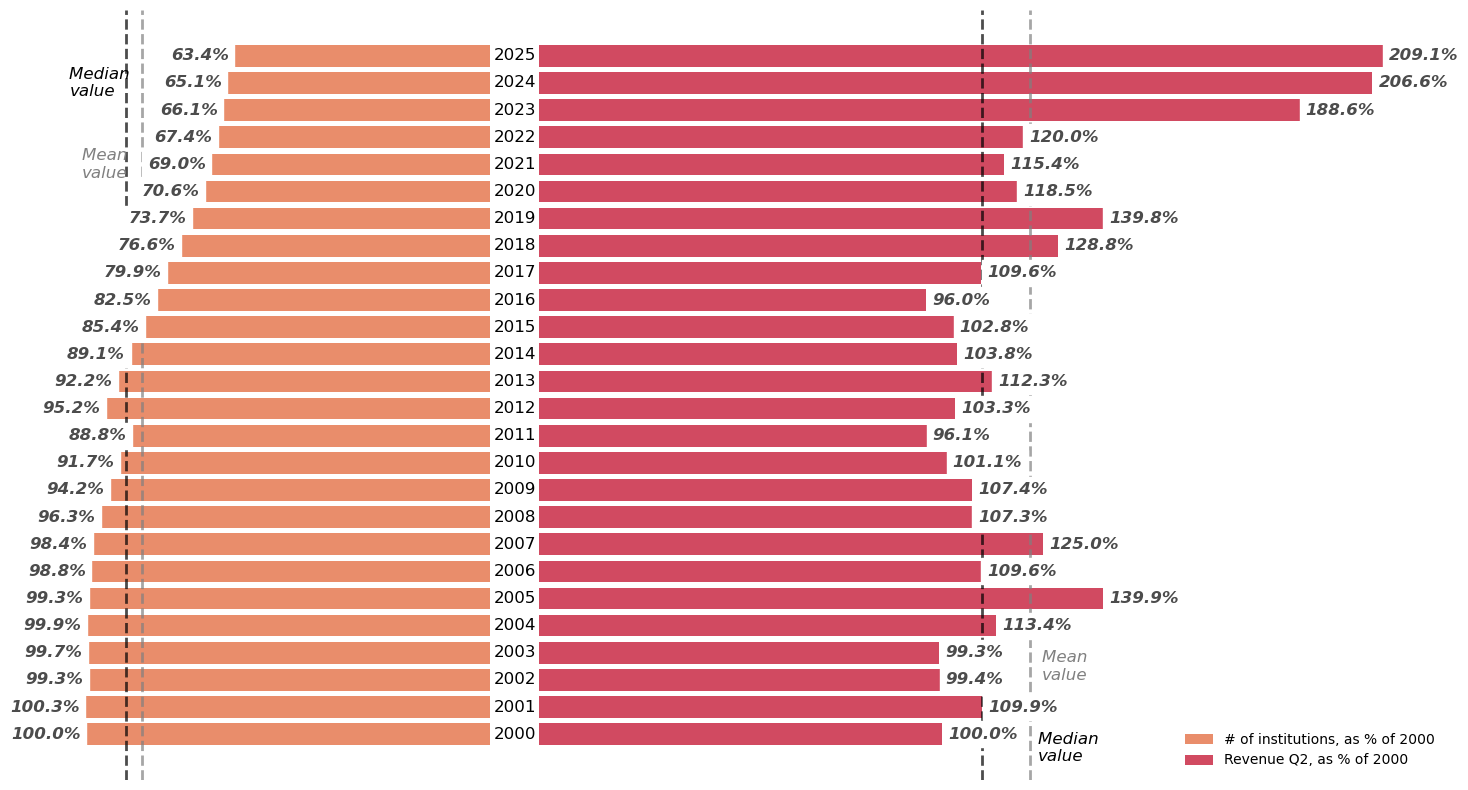

In [ ]:
###FIGURE FOR HOMEWORK III

years = pivot_df.reset_index()['year'].tolist()

count_values = pivot_df.loc[:, '500'].to_numpy()/pivot_df.loc[:, '500'].to_numpy()[0] * 100
rev_values = pivot_rev_df.loc[:, '500'].to_numpy()/pivot_rev_df.loc[:, '500'].to_numpy()[0] * 100

# vertical lines for the mean and median 
count_mean_val = count_values.mean()
count_median_val = np.median(count_values)

rev_mean_val = rev_values.mean()
rev_median_val = np.median(rev_values)


y_pos = np.arange(len(years))

gap = 6  # adjust as needed

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))

ax.axvline(-count_mean_val -gap, color='grey', linestyle='--', linewidth=2, alpha=0.7)
ax.axvline(-count_median_val -gap, color='black', linestyle='--', linewidth=2, alpha=0.7)

ax.text(
    x=-count_mean_val -gap - 15,    
    y=len(y_pos) - 5,   
    s='Mean \nvalue',
    color='grey',
    fontsize=12,
    rotation=0,          
    va='center', 
    fontstyle = 'italic'        
)

ax.text(
    x=-count_median_val -gap -14,    
    y=len(y_pos) - 2,   
    s='Median \nvalue',
    color='black',
    fontsize=12,
    rotation=0,          
    va='center',
    fontstyle = 'italic'         
)

# Plot average and median values (for counts)
ax.axvline(rev_mean_val + gap, color='grey', linestyle='--', linewidth=2, alpha=0.7)
ax.axvline(rev_median_val + gap, color='black', linestyle='--', linewidth=2, alpha=0.7)

ax.text(
    x=rev_mean_val + gap + 3,    
    y=len(y_pos) - 23.5,   
    s='Mean \nvalue',
    color='grey',
    fontsize=12,
    rotation=0,          
    va='center', 
    fontstyle = 'italic'        
)

ax.text(
    x=rev_median_val + gap + 14,    
    y=len(y_pos) - 26.5,   
    s='Median \nvalue',
    color='black',
    fontsize=12,
    rotation=0,          
    va='center',
    fontstyle = 'italic'         
)

# Plot bars
ax.barh(y_pos, -count_values, left=-gap, color=sns.color_palette("flare").as_hex()[0], label='# of institutions, as % of 2000')
ax.barh(y_pos, rev_values, left=gap, color=sns.color_palette("flare").as_hex()[-4], label='Revenue Q2, as % of 2000')

for i, age in enumerate(years):
    ax.text(0, y_pos[i], age, ha='center', va='center', fontsize=12, fontweight='normal')

# Bar labels
for i, count in enumerate(count_values):
    ax.text(-count-gap-1.5, y_pos[i], str(round(count,1)) + '%', ha='right', va='center', fontsize=12, color='black', backgroundcolor = 'white', alpha = 0.7, fontstyle = 'italic', fontweight='bold')
for i, count in enumerate(rev_values):
    ax.text(count+gap+1.5, y_pos[i], str(round(count,1))+ '%', ha='left', va='center', fontsize=12, color='black', backgroundcolor = 'white', alpha = 0.7, fontstyle = 'italic', fontweight='bold')


# Customize the plot
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_yticks([])  
ax.set_xticks([])  
ax.legend(frameon=False, loc='best')
ax.grid(False)
plt.tight_layout()
plt.show()


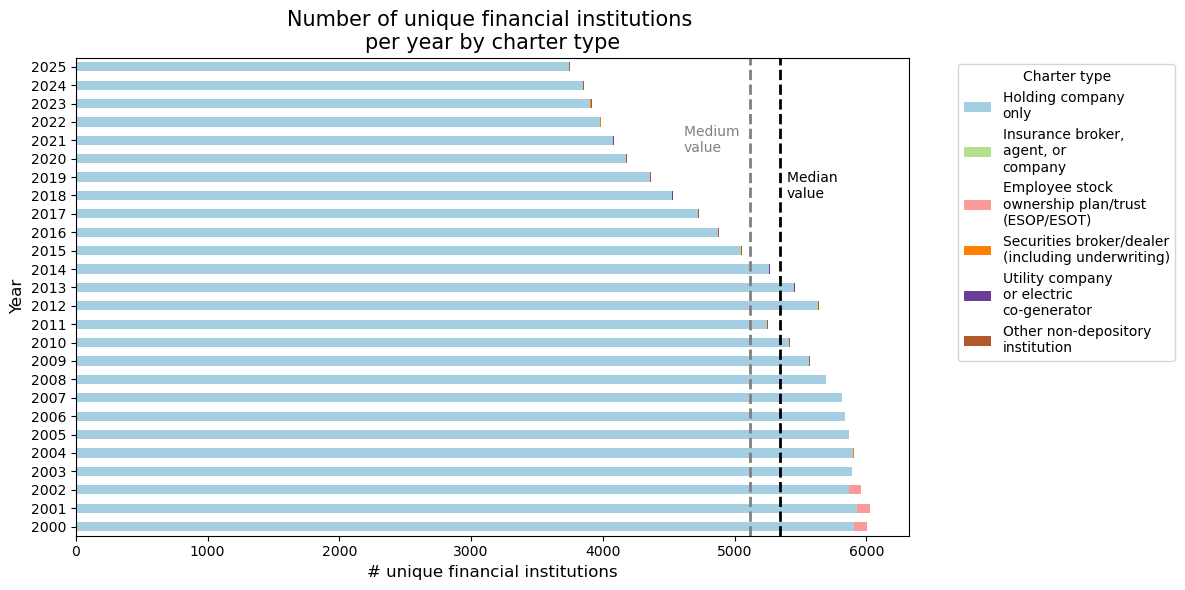

In [ ]:
## plot for number of unique entities per year

fig, ax = plt.subplots(figsize=(12, 6))

pivot_df.rename(columns=dict_chartertype).plot(
    kind='barh',          
    stacked=True,
    ax=ax,
    colormap='Paired'
)

# vertical lines for the mean and median 
mean_val = pivot_df.sum(axis=1).mean()
median_val = pivot_df.sum(axis=1).median()

ax.axvline(mean_val, color='grey', linestyle='--', linewidth=2)
ax.axvline(median_val, color='black', linestyle='--', linewidth=2)

#text to legend lines
ax.text(
    x=mean_val - 500,    
    y=len(pivot_df) - 5,   
    s='Medium \nvalue',
    color='grey',
    fontsize=10,
    rotation=0,          
    va='center'          
)

ax.text(
    x=median_val + 50,    
    y=len(pivot_rev_df) - 7.5,   
    s='Median \nvalue',
    color='black',
    fontsize=10,
    rotation=0,          
    va='center'          
)


#general format of image
ax.set_xlabel('# unique financial institutions', fontsize=12)
ax.set_ylabel('Year', fontsize=12)
ax.set_title('Number of unique financial institutions \nper year by charter type', fontsize=15)
ax.legend(title='Charter type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


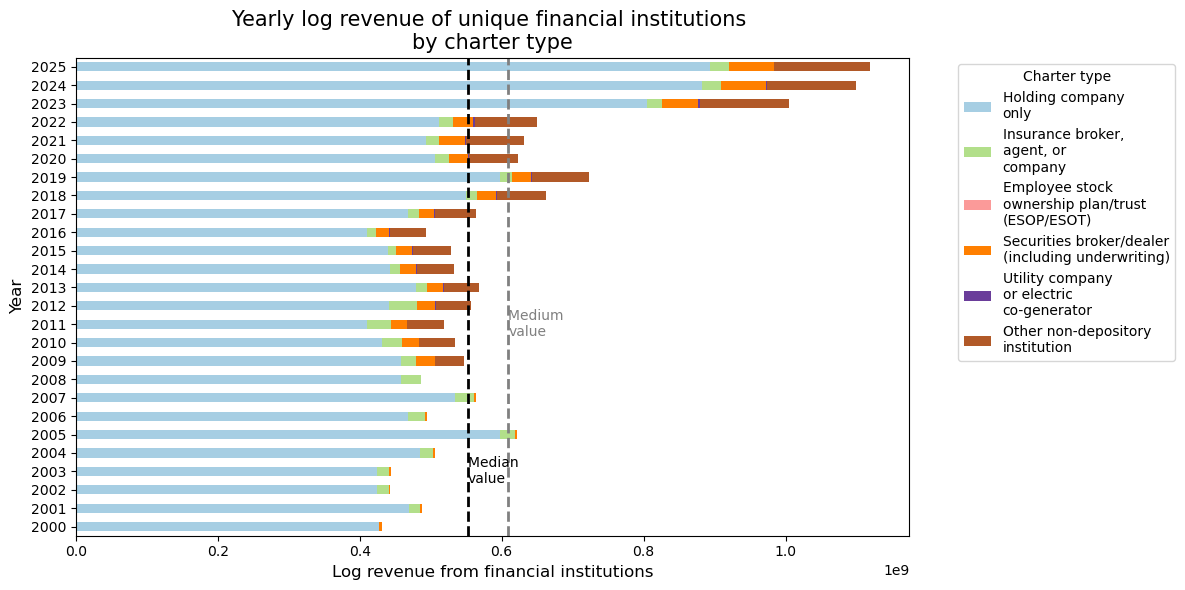

In [ ]:
## plot for revenue per year (some same structure as previous plot)

fig, ax = plt.subplots(figsize=(12, 6))  

pivot_rev_df.rename(columns=dict_chartertype).plot(
    kind='barh',          
    stacked=True,
    ax=ax,
    colormap='Paired'
)

# vertical lines for the mean and median 
mean_val = pivot_rev_df.sum(axis=1).mean()
median_val = pivot_rev_df.sum(axis=1).median()

ax.axvline(mean_val, color='grey', linestyle='--', linewidth=2)
ax.axvline(median_val, color='black', linestyle='--', linewidth=2)

#text to legend lines
ax.text(
    x=mean_val - 499,    
    y=len(pivot_rev_df) - 15,
    s='Medium \nvalue',
    color='grey',
    fontsize=10,
    rotation=0,          
    va='center'          
)

ax.text(
    x=median_val + 51,    
    y=len(pivot_rev_df) - 23,   
    s='Median \nvalue',
    color='black',
    fontsize=10,
    rotation=0,          
    va='center'          
)


#general format
ax.set_xlabel('Log revenue from financial institutions', fontsize=12)
ax.set_ylabel('Year', fontsize=12)
ax.set_title('Yearly log revenue of unique financial institutions \nby charter type', fontsize=15)
ax.legend(title='Charter type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


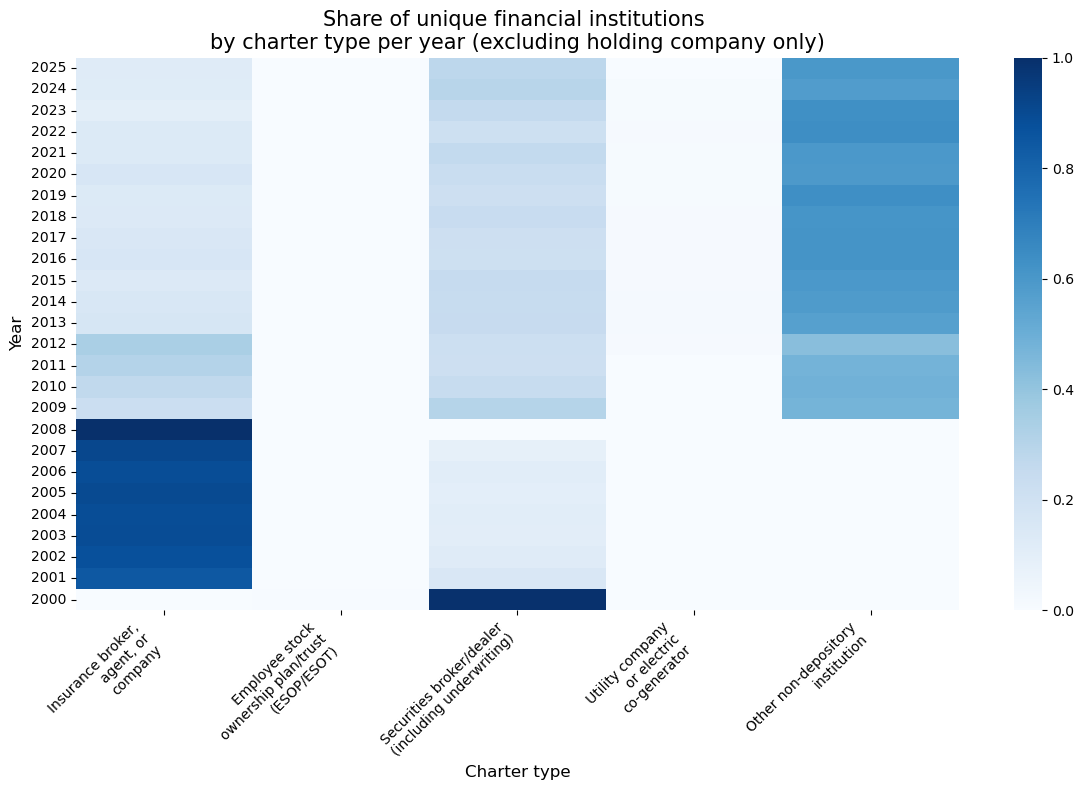

In [ ]:
## plot to understand evolution of underrepresented charter types

pivot_rev_df_renamed=pivot_rev_df.rename(columns=dict_chartertype)
heatmap_data = pivot_rev_df_renamed.iloc[:,1:].div(pivot_rev_df_renamed.iloc[:,1:].sum(axis=1),axis=0).sort_index(ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap="Blues",        
)

plt.title("Share of unique financial institutions \nby charter type per year (excluding holding company only)", fontsize=15)
plt.ylabel("Year", fontsize=12)
plt.xlabel("Charter type", fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

### RQ#1 - ”What is the distribution of financial entities’ size, based on revenue, and profitability, based on net income per revenue, in the US?”

df_all_final['REVENUE_SHIFTED'] = df_all_final['REVENUE']+(np.abs(df_all_final['REVENUE'].min()))+1
df_all_final['NET_INCOME_SHIFTED'] = df_all_final['NET_INCOME']+(np.abs(df_all_final['NET_INCOME'].min()))+1
df_all_final['PROFITABILITY_SHIFTED'] = df_all_final['PROFITABILITY']+(np.abs(df_all_final['PROFITABILITY'].min()))+1

In [ ]:
##Claculation of revenu percentiles to filter dataset after
rev_50pp=np.percentile(df_all_final[df_all_final['REVENUE']!=0]['REVENUE'], 50)
rev_90pp=np.percentile(df_all_final[df_all_final['REVENUE']!=0]['REVENUE'], 90)
rev_95pp=np.percentile(df_all_final[df_all_final['REVENUE']!=0]['REVENUE'], 95)
rev_99pp=np.percentile(df_all_final[df_all_final['REVENUE']!=0]['REVENUE'], 99)
rev_999pp=np.percentile(df_all_final[df_all_final['REVENUE']!=0]['REVENUE'], 99.9)


In [ ]:
##Claculation of revenu percentiles to filter dataset after
prof_50pp=np.percentile(df_all_final[df_all_final['REVENUE']!=0]['PROFITABILITY'], 50)
prof_90pp=np.percentile(df_all_final[df_all_final['REVENUE']!=0]['PROFITABILITY'], 90)
prof_95pp=np.percentile(df_all_final[df_all_final['REVENUE']!=0]['PROFITABILITY'], 95)
prof_99pp=np.percentile(df_all_final[df_all_final['REVENUE']!=0]['PROFITABILITY'], 99)
prof_999pp=np.percentile(df_all_final[df_all_final['REVENUE']!=0]['PROFITABILITY'], 99.9)

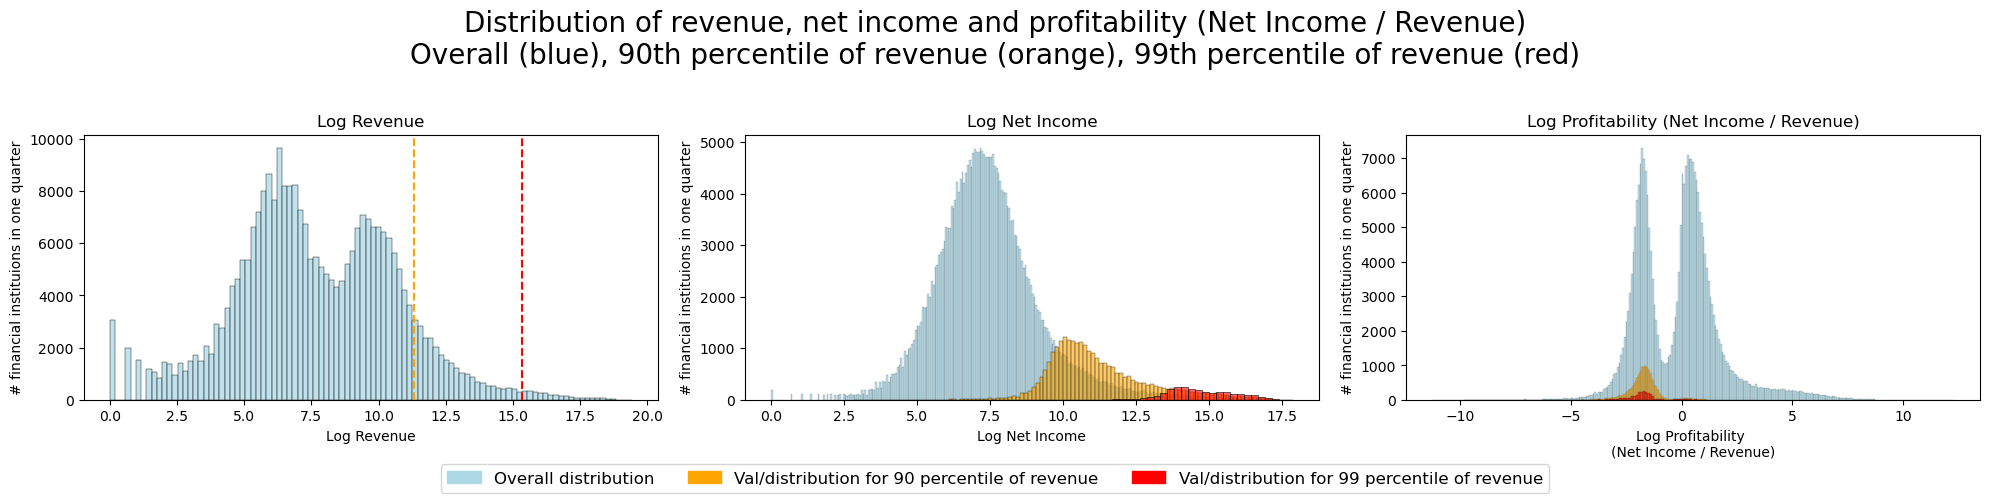

In [ ]:
#plot distribution of revenue, net income and profitability
## filter for non negative values because of log
## also filtered net income and profitability for cases (entity + quarter) with revenue in specific percentiles

fig, axes = plt.subplots(figsize=(20,5),ncols=3)

## Axis 0 - REVENUE

sns.histplot(data=df_all_final[df_all_final['REVENUE']!=0]['REVENUE'].apply(np.log),bins=100,
             color = 'lightblue',
            ax=axes[0])

axes[0].axvline(np.log(rev_90pp), color='orange',linestyle='--')
axes[0].axvline(np.log(rev_99pp), color='red',linestyle='--')

## Axis 1 - NET INCOME
sns.histplot(data=df_all_final[df_all_final['NET_INCOME']!=0]['NET_INCOME'].apply(np.log),
            ax=axes[1],
              color = 'lightblue')

sns.histplot(data=df_all_final[(df_all_final['NET_INCOME']!=0) & 
                              (df_all_final['REVENUE']> rev_90pp)]['NET_INCOME'].apply(np.log),
            color='orange', alpha=0.6,
            ax=axes[1])

sns.histplot(data=df_all_final[(df_all_final['NET_INCOME']!=0) & 
                              (df_all_final['REVENUE']> rev_99pp)]['NET_INCOME'].apply(np.log),
            color='red', alpha=0.6,
            ax=axes[1])


## Axis 2 - PROFITABILITY
sns.histplot(data=df_all_final[(df_all_final['PROFITABILITY']!=0)]['PROFITABILITY'].apply(np.log),
            ax=axes[2],
              color = 'lightblue')

sns.histplot(data=df_all_final[(df_all_final['PROFITABILITY']!=0) & 
                              (df_all_final['REVENUE']> rev_90pp)]['PROFITABILITY'].apply(np.log),
            color='orange', alpha=0.6,
            ax=axes[2])

sns.histplot(data=df_all_final[(df_all_final['PROFITABILITY']!=0) & 
                              (df_all_final['REVENUE']> rev_99pp)]['PROFITABILITY'].apply(np.log),
            color='red', alpha=0.6,
            ax=axes[2])

axes[0].set_ylabel("# financial instituions in one quarter")
axes[1].set_ylabel("# financial instituions in one quarter")
axes[2].set_ylabel("# financial instituions in one quarter")

axes[0].set_xlabel("Log Revenue")
axes[1].set_xlabel("Log Net Income")
axes[2].set_xlabel("Log Profitability \n(Net Income / Revenue)")

plt.suptitle(
    "Distribution of revenue, net income and profitability (Net Income / Revenue)\n"
    "Overall (blue), 90th percentile of revenue (orange), 99th percentile of revenue (red)",
    fontsize=20
)

axes[0].set_title('Log Revenue', fontsize=12) 
axes[1].set_title('Log Net Income', fontsize=12) 
axes[2].set_title('Log Profitability (Net Income / Revenue)', fontsize=12) 

blue_patch = mpatches.Patch(color='lightblue', label='Overall distribution')
orange_patch = mpatches.Patch(color='orange', label='Val/distribution for 90 percentile of revenue')
red_patch = mpatches.Patch(color='red', label='Val/distribution for 99 percentile of revenue')

fig.legend(handles=[blue_patch, orange_patch, red_patch], loc='lower center', ncol=3, fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  

plt.show()

In [ ]:
df_aux = df_all_final[df_all_final['REVENUE'] != 0].reset_index(drop=True)

df_aux['REVENUE_LOG'] = df_aux['REVENUE'].apply(np.log)
df_aux['PROFITABILITY_LOG'] = df_aux['PROFITABILITY'].apply(np.log)

In [ ]:
df_aux

,BHCK1292,BHCK1296,BHCK2170,BHCK3196,BHCK3368,BHCK3521,BHCK4079,BHCK4107,BHCK4340,BHCP4000,...,NET_INCOME_FRY9C,NET_INCOME_FRY9SP,NET_INCOME_FRY9LP,NET_INCOME,PROFITABILITY,year,month,quarter_num,REVENUE_LOG,PROFITABILITY_LOG
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,432366.0,...,0.0,0.0,449067.0,449067.0,1.038627,2025,6,2,12.977028,0.037900
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,6956.0,0.0,6956.0,1.415836,2025,6,2,8.499640,0.347720
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,12123.0,0.0,12123.0,3.117254,2025,6,2,8.265907,1.136952
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4954.0,0.0,4954.0,4.004850,2025,6,2,7.120444,1.387506
4,0,0,31842439,0.0,31727331,0.0,309185.0,1278623.0,231234.0,20503.0,...,231234.0,0.0,231234.0,231234.0,0.145631,2025,6,2,14.277865,-1.926680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279066,7015,890989,86439932,-3279.0,84360199,0.0,218543.0,1285222.0,124942.0,0.0,...,124942.0,0.0,124941.0,124942.0,0.083268,2000,3,1,14.221300,-2.485695
279067,0,0,1128933,-7.0,1090492,0.0,1463.0,16380.0,-558.0,44.0,...,-558.0,0.0,-558.0,-558.0,-0.031285,2000,3,1,9.788974,NaN
279068,77000,4888000,400058000,45000.0,381173000,0.0,4960000.0,7456000.0,2145000.0,1000000.0,...,2145000.0,0.0,2145000.0,2145000.0,0.172137,2000,3,1,16.338114,-1.759464
279069,0,158124,4610604,19.0,4643843,0.0,8226.0,81107.0,14057.0,5021.0,...,14057.0,0.0,14057.0,14057.0,0.157322,2000,3,1,11.400339,-1.849463


In [ ]:
idxmax_=df_aux['REVENUE_LOG'].idxmax()

aux = df_aux.loc[idxmax_].loc[['RSSD9017','year','month']].tolist()

df_aux.loc[idxmax_].loc[['RSSD9017','year','month','PROFITABILITY_LOG','REVENUE_LOG']]

RSSD9017             JPMORGAN CHASE & CO.
year                                 2024
month                                  12
PROFITABILITY_LOG               -1.535118
REVENUE_LOG                      19.41916
Name: 3635, dtype: object

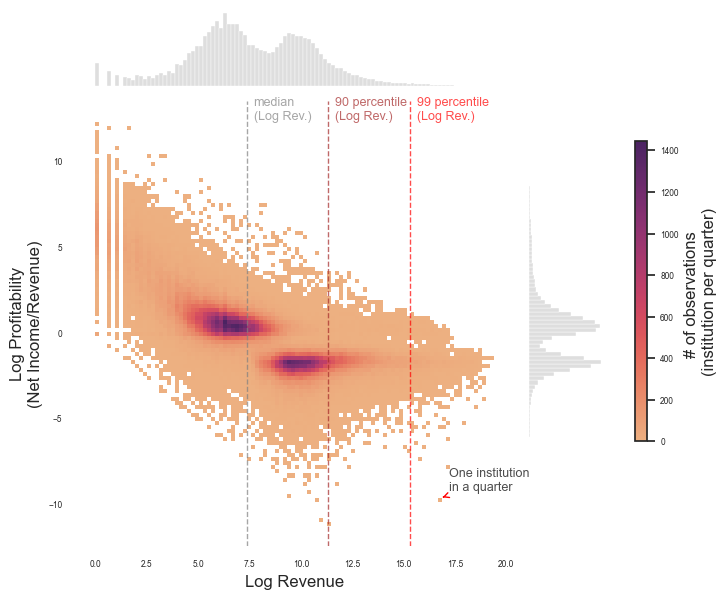

In [ ]:
###FIGURE FOR HOMEWORK III

# Example data
temperature = df_all_final[df_all_final['REVENUE'] != 0]['REVENUE'].apply(np.log).to_numpy()
humidity = df_all_final[df_all_final['REVENUE'] != 0]['PROFITABILITY'].apply(np.log).to_numpy()

sns.set(style="white")


joint = sns.jointplot(
    x=temperature,
    y=humidity,
    kind="hist",
    bins=100,
    cmap="flare",
    marginal_kws=dict(bins=100, fill=True, color="#D3D3D3"),
)

# Add axis labels with smaller font
joint.set_axis_labels("Log Revenue", "Log Profitability\n(Net Income/Revenue)", fontsize=12)

# Reduce tick label size
for ax in [joint.ax_joint, joint.ax_marg_x, joint.ax_marg_y]:
    ax.tick_params(axis='both', which='major', labelsize=6)

# Remove frames/spines
for ax in [joint.ax_joint, joint.ax_marg_x, joint.ax_marg_y]:
    for spine in ax.spines.values():
        spine.set_visible(False)

# Add vertical and horizontal lines at revenue percentiles
joint.ax_joint.axvline(np.log(rev_50pp), color='grey', linestyle='--', linewidth=1, alpha=0.7)
joint.ax_joint.axvline(np.log(rev_90pp), color='brown', linestyle='--', linewidth=1, alpha=0.7)
joint.ax_joint.axvline(np.log(rev_99pp), color='red', linestyle='--', linewidth=1, alpha=0.7)

# Add annotations
joint.ax_joint.annotate("median\n(Log Rev.)", xy=(np.log(rev_50pp), 12), xytext=(5, 5),
                        textcoords='offset points', color='grey', fontsize=9, alpha=0.7)

joint.ax_joint.annotate("90 percentile\n(Log Rev.)", xy=(np.log(rev_90pp), 12), xytext=(5, 5),
                        textcoords='offset points', color='brown', fontsize=9, alpha=0.7)

joint.ax_joint.annotate("99 percentile\n(Log Rev.)", xy=(np.log(rev_99pp), 12), xytext=(5, 5),
                        textcoords='offset points', color='red', fontsize=9, alpha=0.7)

joint.ax_joint.annotate("One institution\nin a quarter", xy=(16.9, -9.6), xytext=(5, 5),
                        textcoords='offset points', color='black', fontsize=9, alpha=0.7,
                        arrowprops=dict(arrowstyle='->', color='red'))

# --- Create a side subplot only for the colorbar ---
fig = joint.fig
cax = fig.add_axes([1.02, 0.25, 0.02, 0.5])  # [left, bottom, width, height]

cbar = plt.colorbar(joint.ax_joint.collections[0], cax=cax)
cbar.set_label("# of observations \n(institution per quarter)", fontsize=12)
cbar.ax.tick_params(labelsize=6)

plt.show()


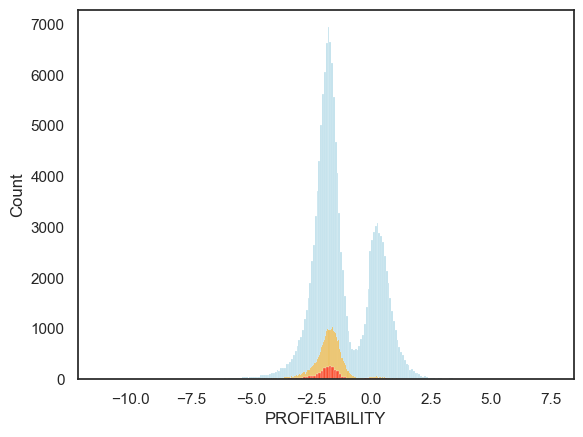

In [ ]:
## example of removing companies with revenue below 1M (revenue is in thousands of dollars)
sns.histplot(data=df_all_final[(df_all_final['PROFITABILITY']!=0)&
                               (df_all_final['REVENUE']>1000)]['PROFITABILITY'].apply(np.log),
              color = 'lightblue')

sns.histplot(data=df_all_final[(df_all_final['PROFITABILITY']!=0) & 
                              (df_all_final['REVENUE']> rev_90pp)]['PROFITABILITY'].apply(np.log),
            color='orange', alpha=0.6,
            )

sns.histplot(data=df_all_final[(df_all_final['PROFITABILITY']!=0) & 
                              (df_all_final['REVENUE']> rev_99pp)]['PROFITABILITY'].apply(np.log),
            color='red', alpha=0.6,
            )
plt.show()

### How much is the weight of loans to other entities in the overall assets?”

In [ ]:
#convert values of assets and laons to float
df_all_final['BHCK1292']=df_all_final['BHCK1292'].astype(float)
df_all_final['BHCK1296']=df_all_final['BHCK1296'].astype(float)
df_all_final['BHCK2170']=df_all_final['BHCK2170'].astype(float)

In [ ]:
cond_loans_usbanks_null=df_all_final['BHCK1292'].isna()==True
cond_loans_nonusbanks_null=df_all_final['BHCK1296'].isna()==True

In [ ]:
## was not able to find the loans to other banks in SP and LP reports, as observed here
(df_all_final[(cond_loans_usbanks_null & cond_loans_nonusbanks_null)][['REVENUE',
                                                                     'REVENUE_FRY9C',
                                                                     'REVENUE_FRY9SP',
                                                                    'REVENUE_FRY9LP']]['REVENUE_FRY9C']==0).value_counts()

REVENUE_FRY9C
True     211529
False       660
Name: count, dtype: int64

In [ ]:
mask = df_all_final['BHCK2170'] != 0

df_all_final['LOANS_NUSBANKS_ASSETS'] = np.nan
df_all_final.loc[mask, 'LOANS_NUSBANKS_ASSETS'] = df_all_final.loc[mask, 'BHCK1292'] / df_all_final.loc[mask, 'BHCK2170']


df_all_final['LOANS_NONUSBANKS_ASSETS'] = np.nan
df_all_final.loc[mask, 'LOANS_NONUSBANKS_ASSETS'] = df_all_final.loc[mask, 'BHCK1296'] / df_all_final.loc[mask, 'BHCK2170']


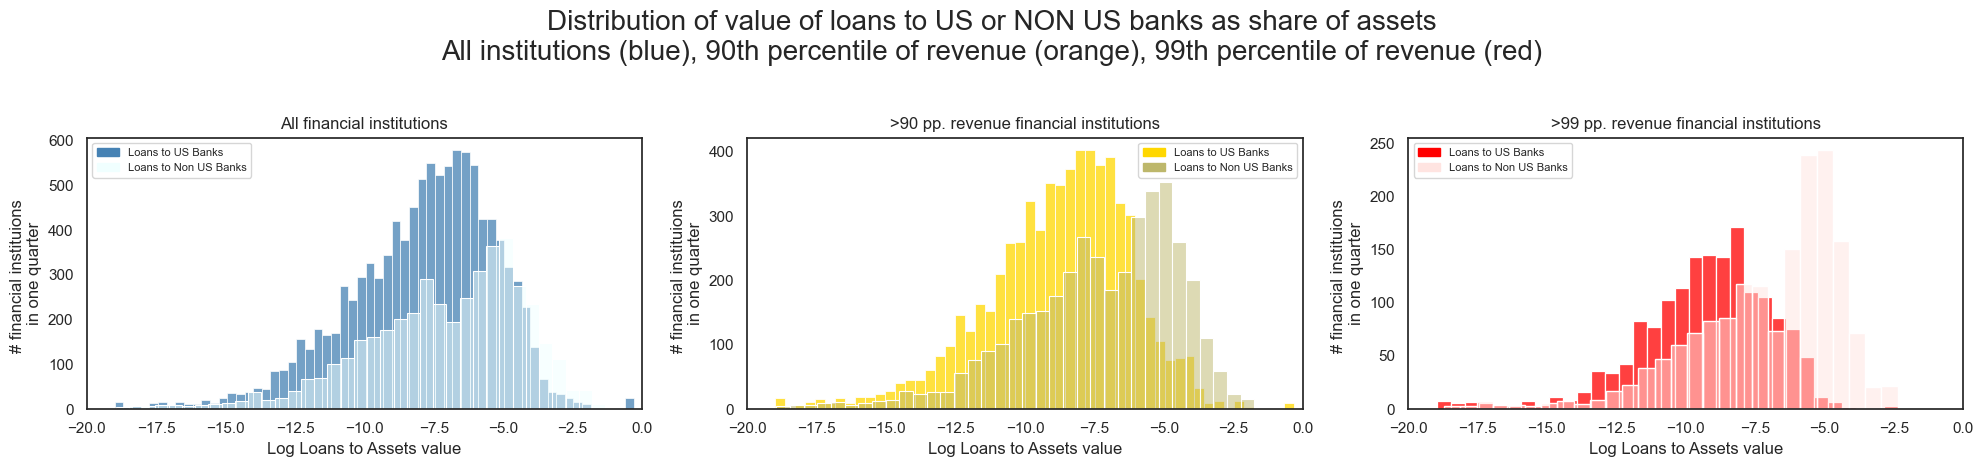

In [ ]:
fig, axes = plt.subplots(figsize=(20,5),ncols=3)

### axis 0 - overall 
sns.histplot(data=df_all_final[(df_all_final['LOANS_NUSBANKS_ASSETS']!=0)]['LOANS_NUSBANKS_ASSETS'].apply(np.log),
            ax=axes[0],
             color='steelblue')

sns.histplot(data=df_all_final[(df_all_final['LOANS_NONUSBANKS_ASSETS']!=0)]['LOANS_NONUSBANKS_ASSETS'].apply(np.log),
            ax=axes[0],
             color='azure',alpha=0.7)

axes[0].set_xlim(-20,0)

dark_patch = mpatches.Patch(color='steelblue', label='Loans to US Banks')
ligth_patch = mpatches.Patch(color='azure', label='Loans to Non US Banks')

axes[0].legend(handles=[dark_patch, ligth_patch], loc='best', ncol=1, fontsize=8)
axes[0].set_title('All financial institutions', fontsize=12) 

### axis 1 - 90 pp
sns.histplot(data=df_all_final[(df_all_final['LOANS_NUSBANKS_ASSETS']!=0)& 
                              (df_all_final['REVENUE']> rev_90pp)]['LOANS_NUSBANKS_ASSETS'].apply(np.log),
             ax=axes[1],
             color='gold')

sns.histplot(data=df_all_final[(df_all_final['LOANS_NONUSBANKS_ASSETS']!=0)& 
                              (df_all_final['REVENUE']> rev_90pp)]['LOANS_NONUSBANKS_ASSETS'].apply(np.log),
            ax=axes[1],
             color='darkkhaki',alpha=0.7)

axes[1].set_xlim(-20,0)

dark_patch = mpatches.Patch(color='gold', label='Loans to US Banks')
ligth_patch = mpatches.Patch(color='darkkhaki', label='Loans to Non US Banks')

axes[1].legend(handles=[dark_patch, ligth_patch], loc='best', ncol=1, fontsize=8)
axes[1].set_title('>90 pp. revenue financial institutions', fontsize=12) 

### axis 1 - 99 pp
sns.histplot(data=df_all_final[(df_all_final['LOANS_NUSBANKS_ASSETS']!=0)& 
                              (df_all_final['REVENUE']> rev_99pp)]['LOANS_NUSBANKS_ASSETS'].apply(np.log),
             ax=axes[2],
             color='red')

sns.histplot(data=df_all_final[(df_all_final['LOANS_NONUSBANKS_ASSETS']!=0)& 
                              (df_all_final['REVENUE']> rev_99pp)]['LOANS_NONUSBANKS_ASSETS'].apply(np.log),
            ax=axes[2],
             color='mistyrose',alpha=0.7)

axes[2].set_xlim(-20,0)

dark_patch = mpatches.Patch(color='red', label='Loans to US Banks')
ligth_patch = mpatches.Patch(color='mistyrose', label='Loans to Non US Banks')

axes[2].legend(handles=[dark_patch, ligth_patch], loc='best', ncol=1, fontsize=8)
axes[2].set_title('>99 pp. revenue financial institutions', fontsize=12) 


plt.suptitle(
    "Distribution of value of loans to US or NON US banks as share of assets\n"
    "All institutions (blue), 90th percentile of revenue (orange), 99th percentile of revenue (red)",
    fontsize=20
)

axes[0].set_ylabel("# financial instituions \nin one quarter")
axes[1].set_ylabel("# financial instituions \nin one quarter")
axes[2].set_ylabel("# financial instituions \nin one quarter")

axes[0].set_xlabel("Log Loans to Assets value")
axes[1].set_xlabel("Log Loans to Assets value")
axes[2].set_xlabel("Log Loans to Assets value")

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # leave 5% at bottom for legend, 95% for plots + suptitle

plt.show()

In [ ]:
penguins = sns.load_dataset("penguins")

In [ ]:
df_aux=df_all_final[(df_all_final['LOANS_NUSBANKS_ASSETS'].fillna(0)!=0)].reset_index(drop=True)
df_aux['REVENUE_LOG'] = df_aux['REVENUE'].apply(np.log)
df_aux['LOANS_NUSBANKS_ASSETS_LOG'] = df_aux['LOANS_NUSBANKS_ASSETS'].apply(np.log)
df_aux['LOANS_NONUSBANKS_ASSETS_LOG'] = df_aux['LOANS_NONUSBANKS_ASSETS'].apply(np.log) 

In [ ]:
df_aux['ID']=df_aux.loc[:,['RSSD9001','year','month']].apply(lambda row: '_'.join(row),axis=1)

In [ ]:
df_melted = df_aux.melt(
    id_vars=['ID'],  # columns to keep
    value_vars=['LOANS_NUSBANKS_ASSETS_LOG','LOANS_NONUSBANKS_ASSETS_LOG'],  # columns to melt
    var_name='Loan_Type',    # name of the new column for melted variable names
    value_name='Amount'      # name of the new column for values
)

In [ ]:
df_fig = df_melted.merge(df_aux.loc[:,['ID','REVENUE_LOG']],on='ID',how='left')

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


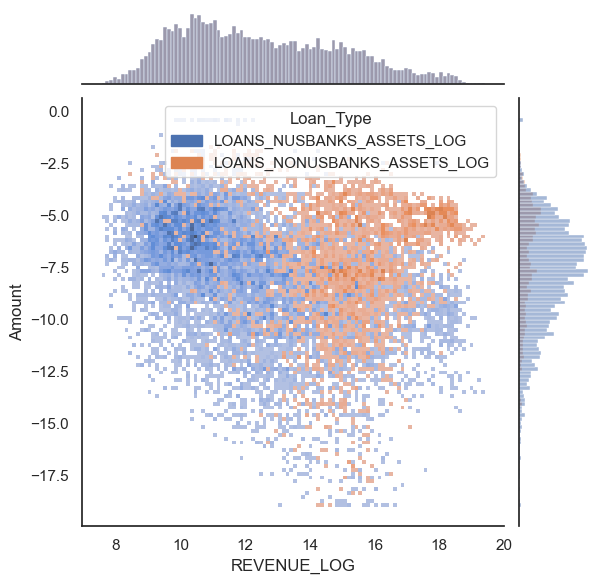

In [ ]:
joint = sns.jointplot(
    data=df_fig, 
    x="REVENUE_LOG", 
    y="Amount", 
    hue="Loan_Type", 
    kind='hist',
    bins=100,
    cmap="ch:s=.25,rot=-.25",
    marginal_kws=dict(bins=100, fill=True),
    )

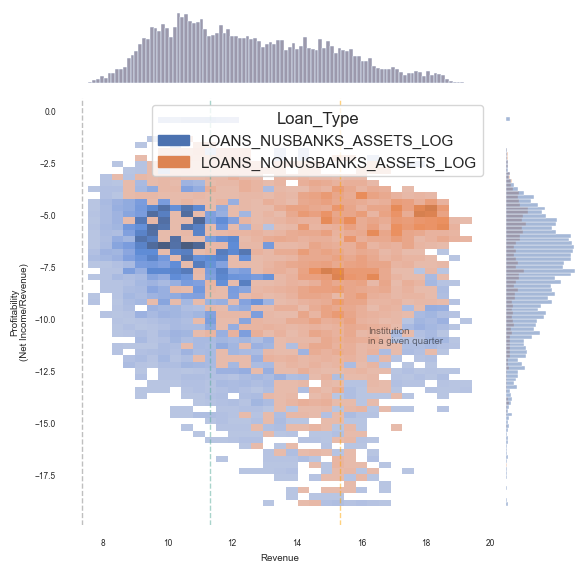

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example data
sns.set(style="white")

# Create jointplot
joint = sns.jointplot(
    data=df_fig, 
    x="REVENUE_LOG", 
    y="Amount", 
    hue="Loan_Type", 
    kind='hist',
    cmap="ch:s=.25,rot=-.25",
    marginal_kws=dict(bins=100, fill=True),
    )

# Add axis labels with smaller font
joint.set_axis_labels("Revenue", "Profitability\n(Net Income/Revenue)", fontsize=7)

# Reduce tick label size
for ax in [joint.ax_joint, joint.ax_marg_x, joint.ax_marg_y]:
    ax.tick_params(axis='both', which='major', labelsize=6)

# Remove frames/spines
for ax in [joint.ax_joint, joint.ax_marg_x, joint.ax_marg_y]:
    for spine in ax.spines.values():
        spine.set_visible(False)

# Add vertical and horizontal lines at zero
joint.ax_joint.axvline(np.log(rev_50pp), color='grey', linestyle='--', linewidth=1, alpha=0.7)
joint.ax_joint.axvline(np.log(rev_90pp), color=sns.color_palette("light:#5A9").as_hex()[-1], linestyle='--', linewidth=1, alpha=0.7)
joint.ax_joint.axvline(np.log(rev_99pp), color='orange', linestyle='--', linewidth=1, alpha=0.7)

#joint.ax_joint.axhline(np.log(prof_50pp), color='grey', linestyle='--', linewidth=1, alpha=0.7)
#joint.ax_joint.axhline(np.log(prof_90pp), color=sns.color_palette("light:#5A9").as_hex()[-1], linestyle='--', linewidth=1, alpha=0.7)
#joint.ax_joint.axhline(np.log(prof_99pp), color='orange', linestyle='--', linewidth=1, alpha=0.7)

#joint.ax_joint.axhline(0, color='red', linestyle='--', linewidth=1)

# Annotate the point (0,0)

joint.ax_joint.annotate("median\n(Revenue)", xy=(np.log(rev_50pp), 12), xytext=(5, 5),
                        textcoords='offset points', color='grey', fontsize=7, alpha=0.7)

joint.ax_joint.annotate("90 percentile\n(Revenue)", xy=(np.log(rev_90pp), 12), xytext=(5, 5),
                        textcoords='offset points', color=sns.color_palette("light:#5A9").as_hex()[-1], fontsize=7, alpha=0.7)

joint.ax_joint.annotate("99 percentile\n(Revenue)", xy=(np.log(rev_99pp), 12), xytext=(5, 5),
                        textcoords='offset points', color='orange', fontsize=7, alpha=0.7)


joint.ax_joint.annotate("Institution\nin a given quarter", xy=(16, -11.5), xytext=(5, 5),
                        textcoords='offset points', color='black', fontsize=7, alpha=0.7)

plt.show()
